# Flight Price Prediction(EDA + Feature Engineering)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test_df = pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
final_df = pd.concat([train_df, test_df], ignore_index=True)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


###  Fetaure Engineering Process

In [ ]:
final_df["Date"] = final_df["Date_of_Journey"].str.split('/').str[0]
final_df["Month"] = final_df["Date_of_Journey"].str.split('/').str[1]
final_df["Year"] = final_df["Date_of_Journey"].str.split('/').str[2]

In [ ]:
# final_df["Date"]=final_df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
# final_df["Month"]=final_df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
# final_df["Year"]=final_df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [ ]:
final_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [ ]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [ ]:
final_df.drop('Date_of_Journey',axis=1,inplace=True  )

In [ ]:
final_df["Arrival_Time"].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
13349    20:25
13350    16:55
13351    04:25
13352    19:15
13353    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [ ]:
final_df["Arrival_Time"] = final_df["Arrival_Time"].apply(lambda x:x.split(' ')[0])



In [ ]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0].astype(int)
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1].astype(int)

In [ ]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [ ]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [ ]:
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0].astype(int)
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[1].astype(int)

final_df.drop('Dep_Time',axis=1,inplace=True)

In [ ]:
final_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.2+ MB


In [ ]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
final_df[final_df["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [ ]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})


In [ ]:
final_df.drop('Route',axis=1,inplace=True)

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
final_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
def duration_to_minutes(duration):
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip()) if 'm' in duration else 0
    return hours * 60 + minutes

final_df['Duration'] = final_df['Duration'].apply(duration_to_minutes)


In [ ]:
final_df["Duration"]=final_df['Duration'].astype(int)

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [ ]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [ ]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [ ]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,3,0,5,170,0.0,8,3897.0,24,3,2019,1,10,22,20
1,1,3,0,445,2.0,8,7662.0,1,5,2019,13,15,5,50
2,4,2,1,1140,2.0,8,13882.0,9,6,2019,4,25,9,25
3,3,3,0,325,1.0,8,6218.0,12,5,2019,23,30,18,5
4,3,0,5,285,1.0,8,13302.0,1,3,2019,21,35,16,50


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int32  
 1   Source           13354 non-null  int32  
 2   Destination      13354 non-null  int32  
 3   Duration         13354 non-null  int32  
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  int32  
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dept_hour        13354 non-null  int32  
 13  Dept_min         13354 non-null  int32  
dtypes: float64(2), int32(12)
memory usage: 834.8 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score




#### Handle missing values
#### Drop rows with missing Price (target variable)

In [ ]:

imputer = SimpleImputer(strategy='mean')
final_df['Total_Stops'] = imputer.fit_transform(final_df[['Total_Stops']])
final_df = final_df.dropna(subset=['Price'])


#### Separate features and target
#### # Split into train and test sets

In [ ]:

X = final_df.drop(columns=['Price'])
y = final_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Train a Random Forest Regressor
#### Predict on test set

In [ ]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)



### Evaluate the model

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 667.2803825407292
R-squared: 0.8656024187607053


### Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validated R²: {scores.mean()}")


Cross-Validated R²: 0.8690361956063682


##  Implementing Random Forest and XGBoost Models


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#### Initialize RandomForest and XGBoost models

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

#### Train both models

In [ ]:
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

#### Predictions from both models

In [ ]:
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

#### Meta-model: Use the predictions of both models to train a linear regressor

In [ ]:
stacking_features = pd.DataFrame({'rf_pred': rf_pred, 'xgb_pred': xgb_pred})
stacking_model = LinearRegression()
stacking_model.fit(stacking_features, y_test)

LinearRegression()

#### Final predictions from stacking model

In [ ]:
stacked_pred = stacking_model.predict(stacking_features)

#### Evaluate the performance

In [ ]:
mae1 = mean_absolute_error(y_test, stacked_pred)
print(f"Mean Absolute Error of Stacked Model: {mae1}")

Mean Absolute Error of Stacked Model: 699.6126953243122


## Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example Grid Search for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}




In [ ]:
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=rf_param_grid, cv=5, scoring='neg_mean_absolute_error')
rf_grid_search.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")


Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1],
    'max_depth': [6, 10]
}
xgb_grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=xgb_param_grid, cv=5, scoring='neg_mean_absolute_error')
xgb_grid_search.fit(X_train, y_train)
print(f"Best XGBoost Parameters: {xgb_grid_search.best_params_}")

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Random Forest MAE (CV): {-rf_scores.mean()}")
print(f"XGBoost MAE (CV): {-xgb_scores.mean()}")


Random Forest MAE (CV): 717.4803212667072
XGBoost MAE (CV): 805.415977514346


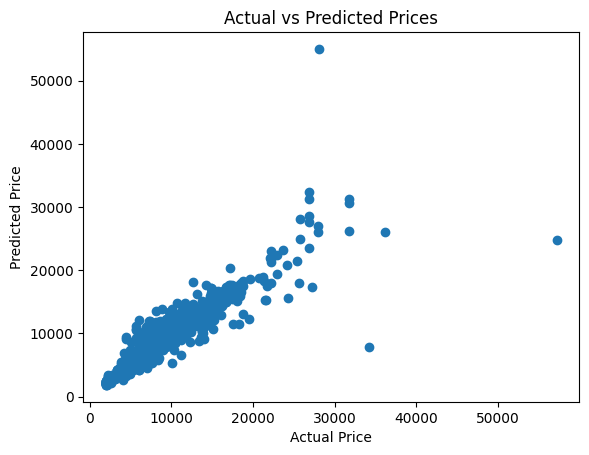

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, stacked_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()
